# Segnali casuali di serie storiche

In questo notebook eseguiamo una routine per generare un grafico temporale di valori casuali. Questo tema è centrale nell'universo Finance per l'analisi tecnica di serie storiche. I valori casuali potranno essere in un secondo momento sostituiti da dati reali presi da un qualsiasi stock exchange. 

Infine andremo a graficare il tutto usando i margini a due deviazioni standard come bande di Bollinger.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Dalla libreria numpy prendiamo il modulo random per generare numeri casuali e il metodo somma cumulativa cumsum().
I valori generati sono float ovvero in virgola mobile e seguono la distribuzione normale centrata a 0 e di deviazione standard 1.

Usiamo inoltre il metodo seed con un qualsiasi numero intero (in questo 1) per disporre della riproducibilità di questo notebook (cfr numeri pseudocasuali).

In [2]:
np.random.seed(1)
valori = np.random.randn(150)
valori

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
       -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038,
        1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944,
       -1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521,
       -1.10061918,  1.14472371,  0.90159072,  0.50249434,  0.90085595,
       -0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547,
       -0.69166075, -0.39675353, -0.6871727 , -0.84520564, -0.67124613,
       -0.0126646 , -1.11731035,  0.2344157 ,  1.65980218,  0.74204416,
       -0.19183555, -0.88762896, -0.74715829,  1.6924546 ,  0.05080775,
       -0.63699565,  0.19091548,  2.10025514,  0.12015895,  0.61720311,
        0.30017032, -0.35224985, -1.1425182 , -0.34934272, -0.20889423,
        0.58662319,  0.83898341,  0.93110208,  0.28558733,  0.88514116,
       -0.75439794,  1.25286816,  0.51292982, -0.29809284,  0.48851815,
       -0.07557171,  1.13162939,  1.51981682,  2.18557541, -1.39

Ora usiamo cumsum() su valori per sommare di volta ogni valore alla somma cumulativa dei precedenti.

In [3]:
valori_cumulativi = valori.cumsum()
valori_cumulativi

array([ 1.62434536,  1.01258895,  0.4844172 , -0.58855142,  0.2768562 ,
       -2.02468249, -0.27987073, -1.04107763, -0.72203853, -0.97140891,
        0.49069903, -1.56944168, -1.89185888, -2.27591324, -1.1421438 ,
       -2.24203506, -2.41446327, -3.29232169, -3.25010794, -2.66729273,
       -3.76791191, -2.6231882 , -1.72159748, -1.21910314, -0.31824719,
       -1.00197505, -1.12486527, -2.06063471, -2.32852279, -1.79816732,
       -2.48982807, -2.8865816 , -3.5737543 , -4.41895994, -5.09020607,
       -5.10287067, -6.22018102, -5.98576532, -4.32596314, -3.58391898,
       -3.77575454, -4.6633835 , -5.41054179, -3.71808719, -3.66727944,
       -4.30427508, -4.1133596 , -2.01310446, -1.89294551, -1.2757424 ,
       -0.97557208, -1.32782193, -2.47034012, -2.81968285, -3.02857708,
       -2.44195389, -1.60297048, -0.67186839, -0.38628107,  0.4988601 ,
       -0.25553785,  0.99733031,  1.51026013,  1.21216729,  1.70068544,
        1.62511373,  2.75674312,  4.27655993,  6.46213534,  5.06

Tra le classi di oggetti di pandas abbiamo gli Index, le Series e i DataFrame. Tra gli Index esistono dei tipi specifici per l'analisi delle serie storiche: i DatetimeIndex. Il metodo di classe date_range restituisce proprio un oggetto DatetimeIndex. Passiamo come argomenti i parametri periods=150 ovvero proprio il numero di dati di valori_cumulativi e freq='B'. 'B' sta per Business Day. Ovvero definiamo una sequenza di date dove avremo omesso automaticamente i fine settimana.

Prendiamo 150 giorni lavorativi a partire dal primo aprile.

In [4]:
dti150 = pd.date_range('2018-4-1',periods=150,freq='B')
dti150

DatetimeIndex(['2018-04-02', '2018-04-03', '2018-04-04', '2018-04-05',
               '2018-04-06', '2018-04-09', '2018-04-10', '2018-04-11',
               '2018-04-12', '2018-04-13',
               ...
               '2018-10-15', '2018-10-16', '2018-10-17', '2018-10-18',
               '2018-10-19', '2018-10-22', '2018-10-23', '2018-10-24',
               '2018-10-25', '2018-10-26'],
              dtype='datetime64[ns]', length=150, freq='B')

Hai notato che il primo aprile era domenica e non è stato inserito nel DatetimeIndex?

Ora, con la sintassi estremamente concisa di pandas forniamo la Series i cui indici sono presi da dti150 e i cui valori sono i valori_cumulativi.

In [5]:
prezzo = pd.Series(valori_cumulativi,dti150)
prezzo

2018-04-02     1.624345
2018-04-03     1.012589
2018-04-04     0.484417
2018-04-05    -0.588551
2018-04-06     0.276856
2018-04-09    -2.024682
2018-04-10    -0.279871
2018-04-11    -1.041078
2018-04-12    -0.722039
2018-04-13    -0.971409
2018-04-16     0.490699
2018-04-17    -1.569442
2018-04-18    -1.891859
2018-04-19    -2.275913
2018-04-20    -1.142144
2018-04-23    -2.242035
2018-04-24    -2.414463
2018-04-25    -3.292322
2018-04-26    -3.250108
2018-04-27    -2.667293
2018-04-30    -3.767912
2018-05-01    -2.623188
2018-05-02    -1.721597
2018-05-03    -1.219103
2018-05-04    -0.318247
2018-05-07    -1.001975
2018-05-08    -1.124865
2018-05-09    -2.060635
2018-05-10    -2.328523
2018-05-11    -1.798167
                ...    
2018-09-17     4.278640
2018-09-18     3.503478
2018-09-19     4.777234
2018-09-20     6.744336
2018-09-21     4.886354
2018-09-24     6.122518
2018-09-25     7.750169
2018-09-26     8.088180
2018-09-27     6.888912
2018-09-28     7.752258
2018-10-01     7

Dopodiché passiamo alla media mobile a 15 periodi (potremmo anche scegliere un altro valore) nonché la deviazione standard del set di dati generato.

In [6]:
mediamobile = prezzo.rolling(15).mean()
deviastd = prezzo.rolling(15).std()

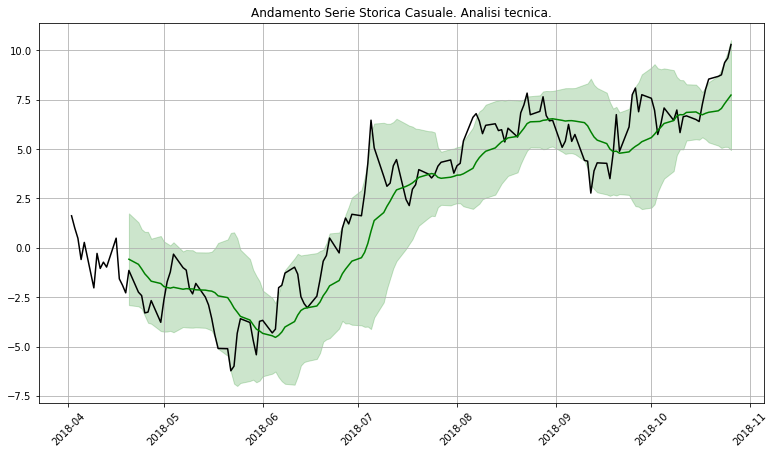

In [7]:
plt.figure(figsize=(13,7))
plt.axis(rot=45)
plt.plot(prezzo.index, prezzo, 'k')
plt.plot(mediamobile.index, mediamobile, 'g')
plt.fill_between(deviastd.index, mediamobile-2*deviastd, mediamobile+2*deviastd, color='g', alpha=0.2)
plt.grid()
plt.title('Andamento Serie Storica Casuale. Analisi tecnica.')

plt.xticks(rotation=45)

plt.show()

Ora creiamo un DataFrame contenente tutte queste informazioni

In [8]:
df = pd.DataFrame()
df['valori'] = valori
df['valori_cumulativi'] = valori_cumulativi
df['media_mobile'] = mediamobile.values
df['deviazione_standard'] = deviastd.values
df.index = dti150

In [9]:
df.head()

,valori,valori_cumulativi,media_mobile,deviazione_standard
2018-04-02,1.624345,1.624345,NaN,NaN
2018-04-03,-0.611756,1.012589,NaN,NaN
2018-04-04,-0.528172,0.484417,NaN,NaN
2018-04-05,-1.072969,-0.588551,NaN,NaN
2018-04-06,0.865408,0.276856,NaN,NaN


Non ci spaventiamo se non abbiamo i primi valori di media mobile e deviazione standard. Li abbiamo definiti con periodi pari a 15. Quindi i primi 14 valori resteranno NaN.

In [10]:
df.head(20)

,valori,valori_cumulativi,media_mobile,deviazione_standard
2018-04-02,1.624345,1.624345,NaN,NaN
2018-04-03,-0.611756,1.012589,NaN,NaN
2018-04-04,-0.528172,0.484417,NaN,NaN
2018-04-05,-1.072969,-0.588551,NaN,NaN
2018-04-06,0.865408,0.276856,NaN,NaN
2018-04-09,-2.301539,-2.024682,NaN,NaN
2018-04-10,1.744812,-0.279871,NaN,NaN
2018-04-11,-0.761207,-1.041078,NaN,NaN
2018-04-12,0.319039,-0.722039,NaN,NaN
2018-04-13,-0.249370,-0.971409,NaN,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019EF81F3EB8>,
      dtype=object)

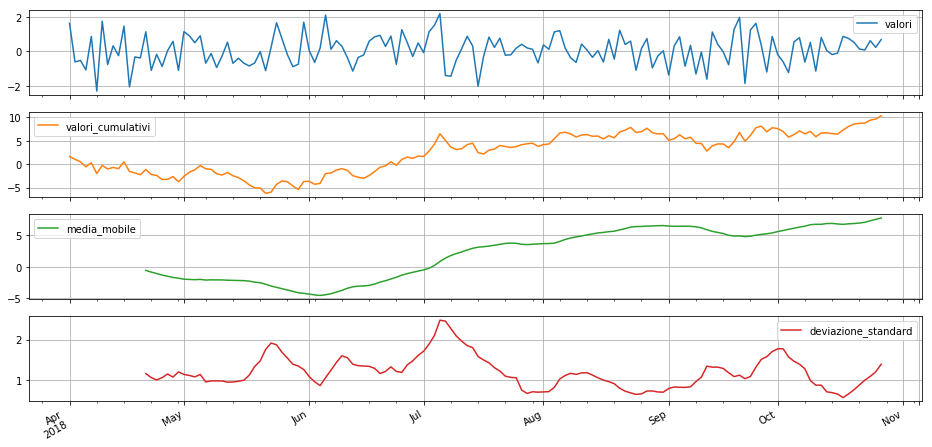

In [11]:
df.plot(subplots=True,grid=True,figsize=(16,8))